In [1]:
%matplotlib widget
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Arc, FancyArrowPatch, ConnectionStyle
from matplotlib.path import Path
from ipywidgets import Output

l = .6 # np.sin(np.deg2rad(5.7))
m = .4 # np.sin(np.deg2rad(5.7))
d2 = l*l + m*m
d = np.sqrt(d2)
n2 = 1 - d2
n = np.sqrt(n2)
nt = d2/n

p1 = np.array([l,m,-nt])*n/d
p2 = np.array([-m,l,0])/d
np.rad2deg(np.arcsin(d))

46.14622138797795

In [2]:
np.linalg.norm(p1)

0.9999999999999999

In [3]:
np.linalg.norm(p2)

0.9999999999999999

In [4]:
D = np.array([[l, m ],[-m,l]])/d

T = np.dot(np.stack((p1,p2)).T, D)
T

array([[ 0.78733715, -0.14177524],
       [-0.14177524,  0.90548318],
       [-0.6       , -0.4       ]])

In [5]:
np.dot(T, T.T)

array([[ 0.64      , -0.24      , -0.41569219],
       [-0.24      ,  0.84      , -0.27712813],
       [-0.41569219, -0.27712813,  0.52      ]])

In [6]:
A = np.array([[1, 0], [0, 1], [0, 0]])
A

array([[1, 0],
       [0, 1],
       [0, 0]])

In [7]:
np.dot(np.dot(A.T, np.dot(T, T.T)), A)

array([[ 0.64, -0.24],
       [-0.24,  0.84]])

In [8]:
A = T

In [9]:
A = np.array([[n/np.sqrt(1-m*m),0],[0,n/np.sqrt(1-l*l)],[-l/np.sqrt(1-m*m), -m/np.sqrt(1-l*l)]])


In [10]:
A

array([[ 0.75592895,  0.        ],
       [ 0.        ,  0.8660254 ],
       [-0.65465367, -0.5       ]])

In [11]:
T

array([[ 0.78733715, -0.14177524],
       [-0.14177524,  0.90548318],
       [-0.6       , -0.4       ]])

In [12]:
(l*l*n + m*m)/d2

0.7873371467113814

In [13]:
l

0.6

In [14]:
phi = np.linspace(0, 2*np.pi, 200)

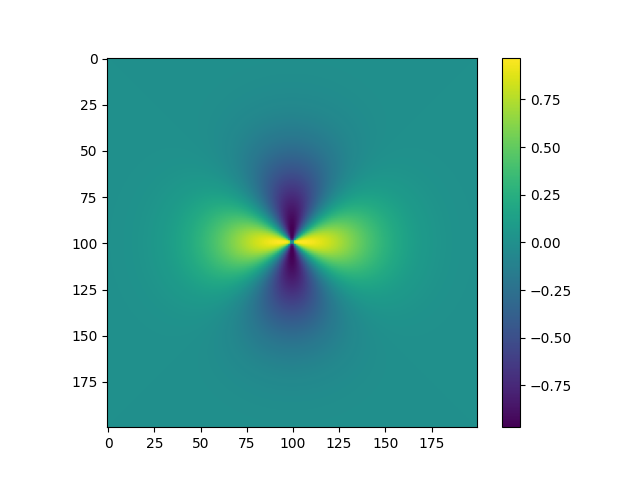

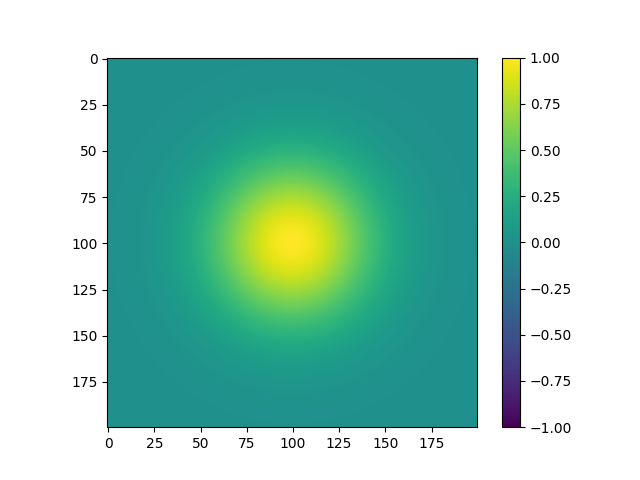

In [15]:
x, y = np.meshgrid(np.linspace(-1, 1, 200), np.linspace(-1, 1, 200));
plt.imshow((x**2-y**2)/(x**2 + y**2)*np.exp(5*(-x**2-y**2)))
plt.colorbar()
plt.savefig('uncorrected.png')
plt.figure()
plt.imshow(np.exp(5*(-x**2-y**2)), clim=(-1,1))
plt.colorbar()
plt.savefig('corrected.png')


In [16]:
plt.plot(np.cos(phi)*np.sin(phi))

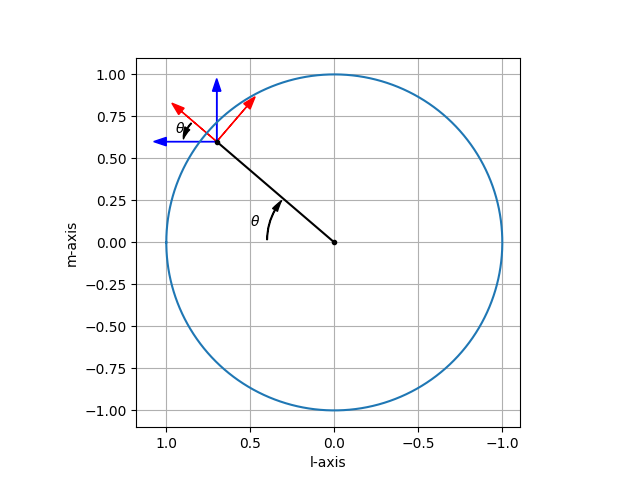

In [17]:
plt.figure()
phi = np.linspace(0, 2*np.pi, 360)
unit_circle = np.exp(1j*phi)
plt.plot(unit_circle.real, unit_circle.imag)

ax = plt.gca()
ax.set_axisbelow(True)
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.invert_xaxis()
ax.set_xlabel('l-axis')
ax.set_ylabel('m-axis')

l = 0.7
m = 0.6
plt.plot([0,l], [0,m], '.-k')
plt.arrow(l,m,l*.3,m*.3, color='red', head_width=.05)
plt.arrow(l,m,-m*.3,l*.3, color='red', head_width=.05)

plt.arrow(l,m,.3,0, color='blue', head_width=.05)
plt.arrow(l,m,0,.3, color='blue', head_width=.05)

#ax.add_patch(Arc((0,0), .8,.8, theta2=45))

radius = .4
theta = np.arctan2(m,l)

style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")
arc1 = FancyArrowPatch((radius,0), (radius*np.cos(theta), radius*np.sin(theta)), connectionstyle=f"arc3,rad={-radius/2}", **kw)
ax.add_patch(arc1)
ax.text(.5,.1, r'$\theta$')

radius2 = .2
arc2 = FancyArrowPatch((l*(1+radius2),m*(1+radius2)), (l + radius2, m), connectionstyle=f"arc3,rad={radius/2}", **kw)
ax.add_patch(arc2)
ax.text(l+.25,m+.05, r'$\theta$')
plt.savefig('rotate_in_image_plane.svg')


In [18]:
d2 = l*l + m*m
d = np.sqrt(d2)
n2 = 1 - d2
n = np.sqrt(n2)
nt = d2/n

p1 = np.array([l,m,-nt])*n/d
p2 = np.array([-m,l,0])/d

T1 = np.stack((p1,p2)).T

In [19]:
v = np.stack([unit_circle.real, unit_circle.imag])

In [20]:
V = np.dot(T1,v)

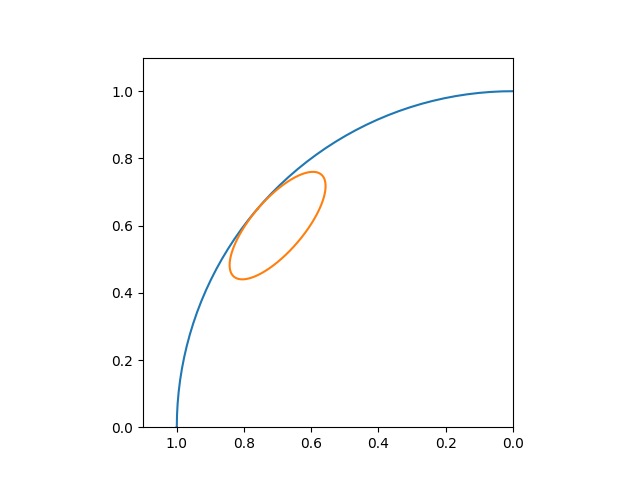

In [24]:
plt.figure()
plt.plot(v[0], v[1])
scale = .2
plt.plot(l+V[0]*scale, m+V[1]*scale)
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
ax = plt.gca()
ax.set_aspect('equal', 'box')
ax.invert_xaxis()
plt.savefig('circle_on_sphere.svg')


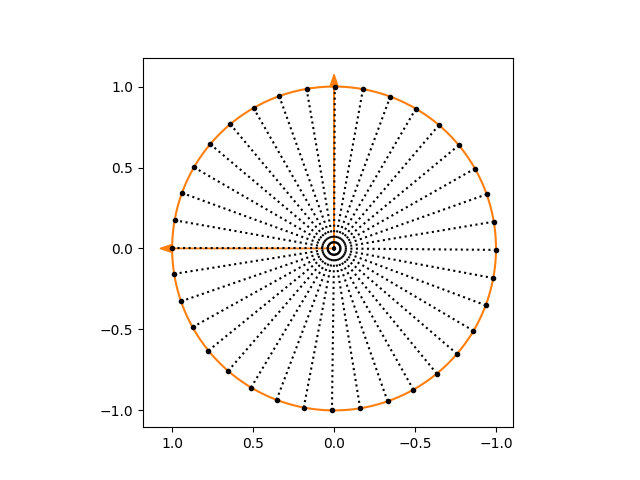

In [30]:
plt.figure()
plt.plot(v[0], v[1], color = 'C1')
x = v[0][::10]
y = v[1][::10]
plt.plot(x, y, 'k.')

x0 = np.stack((x, np.zeros_like(x)))
y0 = np.stack((y, np.zeros_like(y)))
plt.plot(x0, y0, 'k:')

plt.arrow(0,0,1,0, head_width=.05, color='C1')
plt.arrow(0,0,0,1, head_width=.05, color='C1')

ax = plt.gca()
ax.set_aspect('equal', 'box')
ax.invert_xaxis()

plt.savefig('unit_circle.svg')

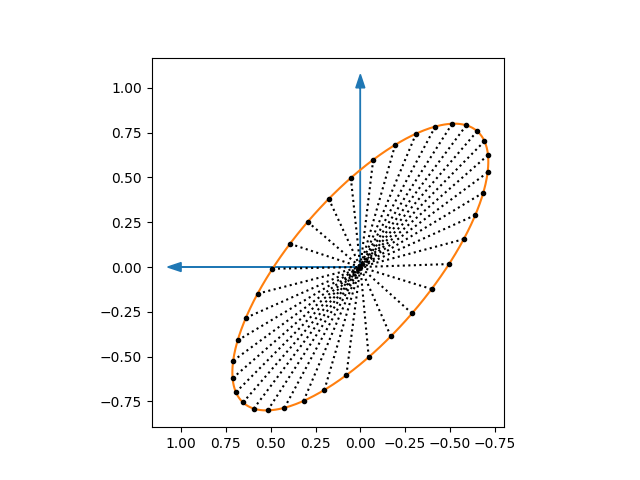

In [28]:
plt.figure()
plt.plot(V[0], V[1], color='C1')
x = V[0][::10]
y = V[1][::10]
plt.plot(x, y, 'k.')

x0 = np.stack((x, np.zeros_like(x)))
y0 = np.stack((y, np.zeros_like(y)))
plt.plot(x0, y0, 'k:')

plt.arrow(0,0,1,0, head_width=.05, color='C0')
plt.arrow(0,0,0,1, head_width=.05, color='C0')

ax = plt.gca()
ax.set_aspect('equal', 'box')
ax.invert_xaxis()
plt.savefig('unit_circle_projected.svg')

In [24]:
np.stack((x, np.zeros_like(x)))

array([[ 0.29405882,  0.17624624,  0.0530487 , -0.07176966, -0.1943952 ,
        -0.31108127, -0.4182627 , -0.51266471, -0.59140299, -0.65207179,
        -0.69281747, -0.7123951 , -0.71020652, -0.6863186 , -0.64146119,
        -0.57700486, -0.49491896, -0.39771153, -0.28835259, -0.17018344,
        -0.04681459,  0.07798462,  0.20040112,  0.31669465,  0.42331203,
         0.51699571,  0.59488333,  0.65459514,  0.69430673,  0.71280477,
         0.70952409,  0.68456491,  0.63868982,  0.57330049,  0.49039477,
         0.39250575],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.     

In [25]:
Arc((0,0), .2,.2, theta2=20)

In [47]:
from ipywidgets import AppLayout, FloatSlider
plt.close('all')
plt.ioff()

#slider = FloatSlider(
#    orientation='vertical',
##    description='Angle:',
#    value=1.0,
#    min=0.0,
#    max=2*np.pi
#)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.height = '80%'
slider.layout.top = '10%'

fig = plt.figure()
phi = np.linspace(0, 2*np.pi, 360)
unit_circle = np.exp(1j*phi)
plt.plot(unit_circle.real, unit_circle.imag)
ax = plt.gca()
ax.set_axisbelow(True)
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.invert_xaxis()
ax.set_xlabel('l-axis')
ax.set_ylabel('m-axis')

radius = .9
theta = 1.0

l = radius * np.cos(theta)
m = radius * np.sin(theta)

lines = plt.plot([0,l], [0,m], '.-k')
arrow_radial = plt.arrow(l,m,l*.3,m*.3, color='red', head_width=.05,length_includes_head=True)
arrow_tangent = plt.arrow(l,m,-m*.3,l*.3, color='red', head_width=.05,length_includes_head=True)

#ax.add_patch(Arc((0,0), .8,.8, theta2=45))

radius1 = .4

style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")
arc1_line = plt.plot(0,0,'k')[0]
arc1_head = FancyArrowPatch((radius1,0), (radius1*np.cos(theta), radius1*np.sin(theta)), connectionstyle=f"arc3,rad=0", **kw)
ax.add_patch(arc1_head)
text1 = ax.text(.4,.15, r'$\theta$', horizontalalignment='center')

radius2 = .2
arc2_line = plt.plot(0,0,'k')[0]
arc2_head = FancyArrowPatch((l*(1+radius2),m*(1+radius2)), (l + T[0,0]*radius2, m + T[1,0]*radius2), connectionstyle=f"arc3,rad=0", **kw)
ax.add_patch(arc2_head)
text2 = ax.text(l+.3,m+.04, r'$\theta$')

# rotate it back
R = np.array([[l, m],[-m, l]])/np.sqrt(l**2+m**2)
v_radial = np.array([[l],[m]])/np.sqrt(l**2+m**2)
v_radial1 = np.dot(R, v_radial)
plt.plot(v_radial1[0], v_radial1[1],'k+')

d2 = l*l + m*m
d = np.sqrt(d2)
n2 = 1 - d2
n = np.sqrt(n2)
nt = d2/n

p1 = np.array([l,m,-nt])*n/d
p2 = np.array([-m,l,0])/d

T = np.dot(np.stack((p1,p2)).T, R)
print(T)

arrow1 = plt.arrow(l,m,.3*T[0,0], .3*T[1,0], color='blue', head_width=.05,length_includes_head=True)
arrow2 = plt.arrow(l,m,.3*T[0,1], .3*T[1,1], color='blue', head_width=.05,length_includes_head=True)

scale = .3
#plt.plot(l+V[0]*scale, m+V[1]*scale,'k')

w_debug_output = Output()

def update_lines(change):
    with w_debug_output if w_debug_output else nullcontext():
        theta = change['new']
        update_theta(theta)
        fig.canvas.draw()
        fig.canvas.flush_events()

def update_theta(theta):    
    global arc1
    l = radius*np.cos(theta)
    m = radius*np.sin(theta)
    lines[0].set_data([0, l], [0, m])
    theta_range = np.linspace(0,theta,100, endpoint=True)
    x = radius1*np.cos(theta_range)
    y = radius1*np.sin(theta_range)
    arc1_line.set_data(x, y)
    arc1_head.set_positions((x[-2], y[-2]), (x[-1], y[-1]) )
    x1 = 1.1*radius1*np.cos(theta/2)
    y1 = 1.1*radius1*np.sin(theta/2)
    text1.set_position((x1,y1))

    x2 = l+1.1*radius2*np.cos(theta/2)+.05
    y2 = m+1.1*radius2*np.sin(theta/2)-.05
    text2.set_position((x2,y2))

    
    arrow_radial.set_data(x=l,y=m,dx=l*.3,dy=m*.3)
    arrow_tangent.set_data(x=l,y=m,dx=-m*.3,dy=l*.3)
    R = np.array([[l, m],[-m, l]])/np.sqrt(l**2+m**2)
        
    d2 = l*l + m*m
    d = np.sqrt(d2)
    n2 = 1 - d2
    n = np.sqrt(n2)
    nt = d2/n

    p1 = np.array([l,m,-nt])*n/d
    p2 = np.array([-m,l,0])/d

    T = np.dot(np.stack((p1,p2)).T, R)
    s0 = np.sqrt(T[0,0]**2 + T[1,0]**2)
    s1 = np.sqrt(T[0,1]**2 + T[1,1]**2)
    arrow1.set_data(x=l,y=m,dx=.3*T[0,0]/s0, dy=.3*T[1,0]/s0)
    arrow2.set_data(x=l,y=m,dx=.3*T[0,1]/s1, dy=.3*T[1,1]/s1)
   

update_theta(theta)
        
slider.observe(update_lines, names='value')

display(w_debug_output)

AppLayout(
    center=fig.canvas,
    left_sidebar=slider,
    pane_heights=[0, 6, 0],
    pane_widths=[.1, 6, 0]
)
#update_lines({'new': theta})

plt.savefig('rotate_in_tangent_plane.svg')


[[ 0.83532127 -0.25647193]
 [-0.25647193  0.60056863]
 [-0.48627208 -0.75732389]]


Output()

In [ ]:
# When using the `widget` backend from ipympl,
# fig.canvas is a proper Jupyter interactive widget, which can be embedded in
# an ipywidgets layout. See https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html

# One can bound figure attributes to other widget values.
from ipywidgets import AppLayout, FloatSlider
plt.close('all')
plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'
slider.layout.left = '-20%'


fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)


In [ ]:
Path.CURVE3